In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

positions = pd.read_csv('improve3/Iter0.csv')
prey1 = pd.read_csv('../data/improved3/Iteration0/prey-3-1691063281.1046634.csv',sep=';')


positions['time'] = positions['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
positions



KeyboardInterrupt: 

In [ ]:
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def smooth(data,window_size = 100):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'valid')

def norm(data):
    return (data - data.min()) / (data.max() - data.min())

def plot_arrows(roboto,axis):
    
    


    smoothed_angles = (roboto.angle.rolling(150).mean().rolling(50).mean().rolling(20).mean())
    #norm(smoothed_angles).plot()
    #norm(roboto.x).plot()
    #norm(roboto.y).plot()

    #derivative = smoothed_angles.diff()
    #norm(derivative).plot()

    #smoothed_angles.plot()

    local_maxima = (smoothed_angles.shift(1) < smoothed_angles) & (smoothed_angles.shift(-1) < smoothed_angles)
    local_min =  (smoothed_angles.shift(1) > smoothed_angles) & (smoothed_angles.shift(-1) > smoothed_angles)
    local_maxima = local_maxima[local_maxima].index
    local_min = local_min[local_min].index

    prev = None
    for i in range(min(len(local_maxima),len(local_min))):
        #print(local_maxima[i])
    
        if np.abs(local_maxima[i] - local_min[i]) > 500:
            continue

        x = roboto.x.loc[local_maxima[i]]
        y = roboto.y.loc[local_maxima[i]]

        start = min(local_maxima[i],local_min[i])
        end = max(local_maxima[i],local_min[i])


        start_angle = roboto.angle.loc[start] * 180 / np.pi
        end_angle = roboto.angle.loc[end] * 180 / np.pi


        #print(x,y,start_angle,end_angle)

        start_x = x + 30 * np.cos(start_angle)
        start_y = y + 30 * np.sin(start_angle)
        end_x = x + 30 * np.cos(end_angle)
        end_y = y + 30 * np.sin(end_angle)


        arc0 = patches.FancyArrowPatch((end_x,end_y), (start_x,start_y),
                                    connectionstyle="arc3,rad=.5",
                                    mutation_scale=20,
                                    arrowstyle="-|>", color="lightblue")
        if prev is not None:
            
            prey_x,prey_y,prev_idx = prev
            if  start - prev_idx < 500:
                arc1 = patches.FancyArrowPatch((end_x,end_y), (prey_x,prey_y),
                                        connectionstyle="arc3,rad=.5",
                                        mutation_scale=20,
                                        arrowstyle="-|>", color="lightblue")
                axis.add_patch(arc1)
        
        
        prev = (end_x,end_y,start)


        #ax.arrow(x,y,0,1,head_width=10, head_length=10, fc='k', ec='k')
        axis.add_patch(arc0)
        
    
    


def plot_run(run,caught=False,id=0):
    preys_pos = run['id'] == 2
    preys_path = run[preys_pos]
    # smooth
    preys_path = preys_path[['time','x','y','angle']]   

    #print('prey angle changes: ',prey_angle_changes)
    #preys_path['x'] = preys_path['x'].astype(np.float64).rolling(100).mean()
    #preys_path['y'] = preys_path['y'].astype(np.float64).rolling(100).mean()
    preys_points = preys_path.iloc[::50, :]

    pred1_pos = run['id'] == 3
    pred1_path = run[pred1_pos]
    pred1_path = pred1_path[['time','x','y','angle']]
    #pred1_path['x'] = pred1_path['x'].astype(np.float64).rolling(100).mean()
    #pred1_path['y'] = pred1_path['y'].astype(np.float64).rolling(100).mean()

    pred1_points = pred1_path.iloc[::50, :]

    pred2_pos = run['id'] == 13
    pred2_path = run[pred2_pos]
    pred2_path = pred2_path[['time','x','y','angle']]

    
    #pred2_path['x'] = pred2_path['x'].astype(np.float64).rolling(100).mean()
    #pred2_path['y'] = pred2_path['y'].astype(np.float64).rolling(100).mean()

    pred2_points = pred2_path.iloc[::50, :]

    #plt.figure(figsize=(5,5))

    plt.plot(preys_path['x'], preys_path['y'],c='g', label='prey path')
    plt.plot(pred1_path['x'], pred1_path['y'], label='predator 1 path')
    plt.plot(pred2_path['x'], pred2_path['y'], label='predator 2 path')

    increased_alphas = np.linspace(0.1, 1, len(preys_points['x']))

    plt.scatter(preys_path['x'].iloc[-1], preys_path['y'].iloc[-1], s= ((30/2)**2) * np.pi, label='prey',c='g',alpha=0.8)
    plt.scatter(pred1_path['x'].iloc[-1], pred1_path['y'].iloc[-1], s= ((30/2)**2) * np.pi, label='predator 1',alpha=0.8)
    plt.scatter(pred2_path['x'].iloc[-1], pred2_path['y'].iloc[-1], s= ((30/2)**2) * np.pi, label='predator 2',alpha=0.8)

    

    if caught:
        plt.scatter(preys_path['x'].iloc[-1], preys_path['y'].iloc[-1], s= ((30/3)**2) * np.pi,c='r',label='prey',marker='x',alpha=0.8)


    # set aspect ratio to be equal
    ax = plt.gcf().gca()

    #plot_arrows(preys_path.copy(),ax)
    #plot_arrows(pred1_path.copy(),ax)
    #plot_arrows(pred2_path.copy(),ax)

    c1 = plt.Circle((pred1_path['x'].iloc[-1],pred1_path['y'].iloc[-1]),radius=60,fill=False,color='r',linestyle='-')
    c2 = plt.Circle((pred2_path['x'].iloc[-1],pred2_path['y'].iloc[-1]),radius=60,fill=False,color='r',linestyle='-')

    ax.add_artist(c1)
    ax.add_artist(c2)

    ax.set_aspect('equal', adjustable='box')

    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')


    plt.xlim(-200, 210)
    plt.ylim(-200, 210)
    #plt.legend()






In [ ]:
import os 
import seaborn as sns

def load_dir(dir,sep=','):
    files = os.listdir(dir) 
    data = []
    for file in files:
        if file.endswith('.csv'):
            file = os.path.join(dir,file)
            df = pd.read_csv(file,sep=sep)
            df['file'] = file
            data.append(df)

    #return pd.concat(data)
    return data

def load_subdir(dir,sep=','):
    dirs = os.listdir(dir)
    data = []
    for subdir in dirs:
        subdir = os.path.join(dir,subdir)
        
        subdir = load_dir(subdir,sep=sep)
        subdir = pd.concat(subdir)
        data.append(subdir)
    return data

map_n_2_id = {
    'predator': [
        3,13
    ],
    'prey': [2,2,2,2,2,2]
}

def x_to_id(x):
    x = x.split('/')[-1]
    sp =  x.split('_')
    id = int(sp[1])-1

    #print(sp[0],id)

    return map_n_2_id[sp[0]][id]

def add_id_2_all(data):
    for d in data:
        del d['Unnamed: 8']
        d['id'] = d['file'].apply(x_to_id)
        d['x'] = d['x'].apply(lambda x: x * 100)
        d['y'] = d['y'].apply(lambda x: x * 100)
        d['angle'] = d['yaw']


In [ ]:


datas_improve2 = load_dir('improve2')
all_improve2 = pd.concat(datas_improve2)

datas_improve3 = load_dir('improve3')
all_improve3 = pd.concat(datas_improve3)

datas_improve1 = load_dir('improve1')
all_improve1 = pd.concat(datas_improve1)

all_improves = pd.concat([all_improve1,all_improve2,all_improve3])

datas_improve1_sim = load_subdir('../data/eval/improve1',';')


datas_improve2_sim = load_subdir('../data/eval/improve2',';')

datas_improve3_sim = load_subdir('../data/eval/improve3',';')




add_id_2_all(datas_improve1_sim)
add_id_2_all(datas_improve2_sim)
add_id_2_all(datas_improve3_sim)

all_improve1_sim = pd.concat(datas_improve1_sim)
all_improve2_sim = pd.concat(datas_improve2_sim)
all_improve3_sim = pd.concat(datas_improve3_sim)

all_improves_sim = pd.concat([all_improve1_sim,all_improve2_sim,all_improve3_sim])

def add_iteration(data):
    for d in data:
        d['iteration'] = d['file'].apply(lambda x: int(x.replace('.csv','').split('/')[-1][-1]))

add_iteration(datas_improve1)
add_iteration(datas_improve2)
add_iteration(datas_improve3)
#data_improves_sim = pd.concat([data_improve1_sim,data_improve2_sim,data_improve3_sim])






In [ ]:
datas_improve1[0]

,time,id,x,y,angle,file,iteration
0,1.691526e+09,13,-85.628741,-77.804485,3.123413,improve1/Iter8.csv,8
1,1.691526e+09,3,156.398291,-71.621644,1.349968,improve1/Iter8.csv,8
2,1.691526e+09,2,-4.353391,87.296531,-2.174546,improve1/Iter8.csv,8
3,1.691526e+09,13,-85.628741,-77.804485,3.123413,improve1/Iter8.csv,8
4,1.691526e+09,3,156.398291,-71.621644,1.349968,improve1/Iter8.csv,8
...,...,...,...,...,...,...,...
3585,1.691527e+09,3,163.372788,102.534414,-2.530867,improve1/Iter8.csv,8
3586,1.691527e+09,2,-25.029710,107.121751,-1.975688,improve1/Iter8.csv,8
3587,1.691527e+09,13,-4.674885,-155.971357,-0.260602,improve1/Iter8.csv,8
3588,1.691527e+09,3,163.363589,102.246531,-2.530867,improve1/Iter8.csv,8


In [ ]:
robot_real_improve2 = load_subdir('../data/imporved2',sep=';')
robot_real_improve3 = load_subdir('../data/improved3',sep=';')
robot_real_improve1 = load_subdir('../data/improved1',sep=';')

def x_to_iteration(x):
    sp = x.split('/')

    iteration = int(sp[-2][-1])

    return iteration

def add_datetime(data):
    arr = []
    for d in data:
        df = d.copy()
        df['time'] = df['time'].apply(datetime.datetime.fromtimestamp)
        df['time'] = df['time'] - df['time'].min()
        df.set_index('time',inplace=True)

        #df = df.resample('1ms').mean()
        #df = df.interpolate(method='linear')


        arr.append(df)

    return arr

def add_iteration_id(data):
    #print(d['file'])
    for d in data:
        d['id'] = d['file'].apply(lambda x: x_to_id(x.replace('-','_').replace('prey_3','prey_1').replace('predator_1','predator_1').replace('predator_4','predator_2')))
        d['iteration'] = d['file'].apply(lambda x: x_to_iteration(x))
        d['time'] = d['real_time'].apply(datetime.datetime.fromtimestamp)
        d['time'] = d['time'] - d['time'].min()
        d.set_index('time',inplace=True)

def select_id(data,id):
    return data[data['id'] == id]
        

        # resample
        #d = d.resample('1ms',
        #d = d.interpolate(method='linear')


    
add_iteration_id(robot_real_improve2)
add_iteration_id(robot_real_improve3)
add_iteration_id(robot_real_improve1)

dated_datas_improve1 = add_datetime(datas_improve1)
dated_datas_improve2 = add_datetime(datas_improve2)
dated_datas_improve3 = add_datetime(datas_improve3)

sorted_datas_improve1 = sorted(dated_datas_improve1,key=lambda x: x['iteration'].iloc[0])
sorted_datas_improve2 = sorted(dated_datas_improve2,key=lambda x: x['iteration'].iloc[0])
sorted_datas_improve3 = sorted(dated_datas_improve3,key=lambda x: x['iteration'].iloc[0])

sorted_robot_real_improve1 = sorted(robot_real_improve1,key=lambda x: x['iteration'].iloc[0])
sorted_robot_real_improve2 = sorted(robot_real_improve2,key=lambda x: x['iteration'].iloc[0])

sorted_robot_real_improve3 = sorted(robot_real_improve3,key=lambda x: x['iteration'].iloc[0])

sorted_robot_real_improve2 = sorted_robot_real_improve2[:5] + sorted_robot_real_improve2[6:]


In [ ]:
sorted_robot_real_improve2[0].head() 

,value,reward,action,real_time,timestep,loss,file,id,iteration
time,,,,,,,,,
0 days 00:00:00,0.623452,1,0,1.690805e+09,0,0.001488,../data/imporved2/Iteration0/prey-3-1690804763...,2,0
0 days 00:00:09.752978,0.622427,1,0,1.690805e+09,1,0.000183,../data/imporved2/Iteration0/prey-3-1690804763...,2,0
0 days 00:00:10.041502,0.622430,1,0,1.690805e+09,2,0.000183,../data/imporved2/Iteration0/prey-3-1690804763...,2,0
0 days 00:00:10.137327,0.626227,1,0,1.690805e+09,3,0.004024,../data/imporved2/Iteration0/prey-3-1690804763...,2,0
0 days 00:00:10.175607,0.622437,1,0,1.690805e+09,4,0.000183,../data/imporved2/Iteration0/prey-3-1690804763...,2,0


In [ ]:
def resample(data):
    data = data.copy()
    data.reset_index(inplace=True)
    data['time'] = data['time'] - data['time'].min()
    data.set_index('time',inplace=True)
    file = data['file'].iloc[0]
    data = data.resample('100ms').mean()
    data['file'] = file
    data = data.interpolate(method='linear')
    #print(data)
    return data

def merge(robot,datas):
    arr = []
    for i in range(len(robot)):
        r = robot[i].copy()
        d = datas[i].copy()

        prey_r = select_id(r,2)
        predator1_r = select_id(r,3)
        predator2_r = select_id(r,13)

        prey_d = select_id(d,2)
        predator1_d = select_id(d,3)
        predator2_d = select_id(d,13)

        prey_r = resample(prey_r)
        predator1_r = resample(predator1_r)
        predator2_r = resample(predator2_r)

        prey_d = resample(prey_d)
        predator1_d = resample(predator1_d)
        predator2_d = resample(predator2_d)

        prey_r.reset_index(inplace=True)
        predator1_r.reset_index(inplace=True)
        predator2_r.reset_index(inplace=True)

        prey_d.reset_index(inplace=True)
        predator1_d.reset_index(inplace=True)
        predator2_d.reset_index(inplace=True)
        #print(prey_r)
        #print(prey_d)
        # 'id', 'iteration'
        drop_columns = ['id','iteration']

        prey_r.drop(columns=drop_columns,inplace=True)
        predator1_r.drop(columns=drop_columns,inplace=True)
        predator2_r.drop(columns=drop_columns,inplace=True)
        prey_d.drop(columns=drop_columns,inplace=True)
        predator1_d.drop(columns=drop_columns,inplace=True)
        predator2_d.drop(columns=drop_columns,inplace=True)

        


        prey_r.rename(columns={'reward':'reward_prey',
                                'value':'value_prey',
                                'action':'action_prey',
                                'real_time':'real_time_prey',
                                'timestep':'timestep_prey',
                                'loss':'loss_prey',
                                'file':'file_prey_d'
                                }
                        ,inplace=True)

        predator1_r.rename(columns={'reward':'reward_predator1',
                                    'value':'value_predator1',
                                    'action':'action_predator1',
                                    'real_time':'real_time_predator1',
                                    'timestep':'timestep_predator1',
                                    'loss':'loss_predator1',
                                    'file':'file_predator1_d'
                            },inplace=True)
        predator2_r.rename(columns={'reward':'reward_predator2',
                                    'value':'value_predator2',
                                    'action':'action_predator2',
                                    'real_time':'real_time_predator2',
                                    'timestep':'timestep_predator2',
                                    'loss':'loss_predator2',
                                    'file':'file_predator2_d'
        },inplace=True)


        prey_d.rename(columns={'x':'x_prey','y':'y_prey','angle':'angle_prey','file':'file_prey_r'},inplace=True)
        predator1_d.rename(columns={'x':'x_predator1','y':'y_predator1','angle':'angle_predator1', 'file':'file_predator1_r'},inplace=True)
        predator2_d.rename(columns={'x':'x_predator2','y':'y_predator2','angle':'angle_predator2', 'file':'file_predator2_r'},inplace=True)

        #
        
        combined = pd.merge(prey_r,prey_d,on='time',how='outer',suffixes=('',''))

        c_predator1_d = pd.merge(predator1_r,predator1_d,on='time',how='outer',suffixes=('',''))
        c_predator2_d = pd.merge(predator2_r,predator2_d,on='time',how='outer',suffixes=('',''))

        combined = pd.merge(combined,c_predator1_d,on='time',how='outer',suffixes=('',''))
        combined = pd.merge(combined,c_predator2_d,on='time',how='outer',suffixes=('',''))



        #print(combined)

        arr.append(combined)
        #return arr
    
    return arr

# merge:
merged_robot_real_improve1 = merge(sorted_robot_real_improve1,sorted_datas_improve1)
merged_robot_real_improve2 = merge(sorted_robot_real_improve2,sorted_datas_improve2)
merged_robot_real_improve3 = merge(sorted_robot_real_improve3,sorted_datas_improve3)


In [ ]:
merged_robot_real_improve3[0].head()

,time,value_prey,reward_prey,action_prey,real_time_prey,timestep_prey,loss_prey,file_prey_d,x_prey,y_prey,...,reward_predator2,action_predator2,real_time_predator2,timestep_predator2,loss_predator2,file_predator2_d,x_predator2,y_predator2,angle_predator2,file_predator2_r
0,0 days 00:00:00,-0.077222,1.0,2.0,1.691063e+09,0.0,0.003730,../data/improved3/Iteration0/prey-3-1691063281...,76.579616,109.067219,...,0.0,1.0,1.691063e+09,0.000000,0.015875,../data/improved3/Iteration0/predator-4-169106...,-80.104634,-29.090175,3.103875,improve3/Iter0.csv
1,0 days 00:00:00.100000,-0.071837,1.0,2.0,1.691063e+09,0.5,0.002842,../data/improved3/Iteration0/prey-3-1691063281...,76.579616,109.067219,...,0.0,1.0,1.691063e+09,0.500000,0.008923,../data/improved3/Iteration0/predator-4-169106...,-80.104634,-29.090175,3.103875,improve3/Iter0.csv
2,0 days 00:00:00.200000,-0.066452,1.0,2.0,1.691063e+09,1.0,0.001954,../data/improved3/Iteration0/prey-3-1691063281...,76.579616,109.067219,...,0.0,1.0,1.691063e+09,1.000000,0.001972,../data/improved3/Iteration0/predator-4-169106...,-80.104634,-29.090175,3.103875,improve3/Iter0.csv
3,0 days 00:00:00.300000,-0.073852,1.0,2.0,1.691063e+09,1.5,0.008616,../data/improved3/Iteration0/prey-3-1691063281...,76.579616,109.067219,...,0.0,1.0,1.691063e+09,1.333333,0.008458,../data/improved3/Iteration0/predator-4-169106...,-80.104634,-29.090175,3.103875,improve3/Iter0.csv
4,0 days 00:00:00.400000,-0.081252,1.0,2.0,1.691063e+09,2.0,0.015278,../data/improved3/Iteration0/prey-3-1691063281...,76.579616,109.067219,...,0.0,1.0,1.691063e+09,1.666667,0.014944,../data/improved3/Iteration0/predator-4-169106...,-80.104634,-29.090175,3.103875,improve3/Iter0.csv


/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/528504044.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reward_predator2'].iloc[-1] = (df['reward_predator2'].iloc[-1] + 10000 * 0.8) + 100000 * 0.2
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/528504044.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reward_prey'].iloc[-1] = df['reward_prey'].iloc[-1] - 100
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/528504044.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

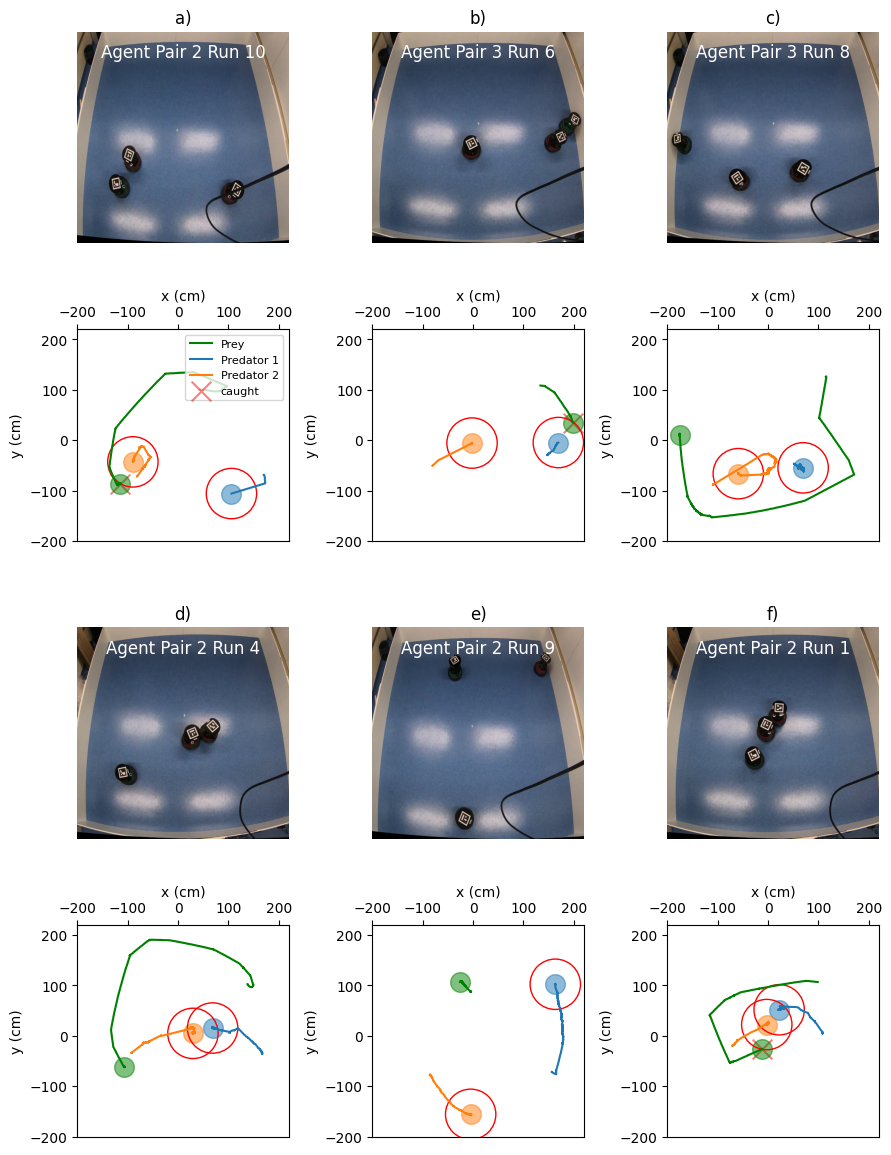

In [ ]:
# summarize the data
sorted_datas_improve1[0]
merged_robot_real_improve1[0].dropna()
gamma = 0.99
def find_caught(df):
    dist_1 = np.sqrt((df['x_prey'] - df['x_predator1'])**2 + (df['y_prey'] - df['y_predator1'])**2)
    dist_2 = np.sqrt((df['x_prey'] - df['x_predator2'])**2 + (df['y_prey'] - df['y_predator2'])**2)
    
    min_dist_1 = np.where(dist_1 < 50)
    min_dist_2 = np.where(dist_2 < 50)
    if min_dist_1[0].size > 0:
        min_dist_1 = min_dist_1[0][0]
    else:
        min_dist_1 = np.Inf
    if min_dist_2[0].size > 0:
        min_dist_2 = min_dist_2[0][0]
    else:
        min_dist_2 = np.Inf


    #print(dist_1[min_dist_1],dist_2[min_dist_2])
    #print(min_dist_1, min_dist_2)
    min_dist_i = min(min_dist_1,min_dist_2)
    min_arg = np.argmin([min_dist_1,min_dist_2])

    return min_dist_i, min_arg

def clean_df(df):
    min_dist_i, arg= find_caught(df)

    df['reward_predator1'] = df['reward_predator1'] * 0.8
    df['reward_predator2'] = df['reward_predator2'] * 0.8

    


    if min_dist_i != np.Inf:

        df = df.iloc[:min_dist_i+1]
        #print(df.iloc[min_dist_i])

        #print(df['reward_predator1'].iloc[-1] + 10000)
        if arg == 0:
            df['reward_predator1'].iloc[-1] = (df['reward_predator1'].iloc[-1] + 10000 * 0.8) + 100000 * 0.2
            #df['reward_predator2'].iloc[-1] = df['reward_predator2'].iloc[-1] + 100000 * 0.2
            df['reward_prey'].iloc[-1] = df['reward_prey'].iloc[-1] - 100
        else:
            df['reward_predator2'].iloc[-1] = (df['reward_predator2'].iloc[-1] + 10000 * 0.8) + 100000 * 0.2
            #df['reward_predator1'].iloc[-1] = df['reward_predator1'].iloc[-1] + 100000 * 0.2
            df['reward_prey'].iloc[-1] = df['reward_prey'].iloc[-1] - 100
            



    ##(df['reward_predator1'] / 1000).plot()
    #compute_gae(df).plot()
    #compute_reward(df).plot()
    #df['value_predator1'].plot()#.norm().plot()

    return df, min_dist_i != np.Inf

action_converter = [0.,-1.,1.]
#def plot_actions(df,entity='predator1',ax):
#    global action_converter
#    col = f'action_{entity}'
#    df[col] = df[col].astype(int)
#    df[col] = df[col].apply(lambda x: action_converter[x])
#    (df[f'action_{entity}']).rolling(10).mean().round().plot()

#    if  :
#                arc1 = patches.FancyArrowPatch((end_x,end_y), (prey_x,prey_y),
#                                        connectionstyle="arc3,rad=.5",
#                                        mutation_scale=20,
#                                        arrowstyle="-|>", color="lightblue")
#                axis.add_patch(arc1)
#        
#        
#        prev = (end_x,end_y,start)#


        #ax.arrow(x,y,0,1,head_width=10, head_length=10, fc='k', ec='k')
#       axis.add_patch(arc0)

    

    


def plot_run(df):
    df,caught = clean_df(df)
    
    plt.plot(df['x_prey'],df['y_prey'],color='green')
    plt.plot(df['x_predator1'],df['y_predator1'])
    plt.plot(df['x_predator2'],df['y_predator2'])

    rob_size = ((30/3 * 4/5) ** 2) * np.pi #* 2/

    if caught:
        plt.scatter(df['x_prey'].iloc[-1],df['y_prey'].iloc[-1],color='red',marker='x',alpha=0.5,s=rob_size)
    

    plt.scatter(df['x_prey'].iloc[-1],df['y_prey'].iloc[-1],color='green',alpha=0.5,s=rob_size)
    plt.scatter(df['x_predator1'].iloc[-1],df['y_predator1'].iloc[-1],alpha=0.5, s=rob_size)
    plt.scatter(df['x_predator2'].iloc[-1],df['y_predator2'].iloc[-1],alpha=0.5, s=rob_size)

    plt.xlim(-200, 220)
    plt.ylim(-200, 220)

    cir_1 = plt.Circle((df['x_predator1'].iloc[-1],df['y_predator1'].iloc[-1]), 50, color='r', fill=False)
    cir_2 = plt.Circle((df['x_predator2'].iloc[-1],df['y_predator2'].iloc[-1]), 50, color='r', fill=False)

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.add_artist(cir_1)
    ax.add_artist(cir_2)
    
    
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')

import cv2

import calibration


def get_last_frame(run,range=0):
    run = run.copy()
    test = find_caught(run)
    last_point = run.iloc[-1]
    if not (test[0] == np.Inf):

        last_point = run.iloc[test[0]]

    timestamp = last_point['time']
    # to seconds 
    timestamp = timestamp.total_seconds() + 2

    file = last_point['file_predator2_r']
    file = file.replace('.csv','.MP4')

    cap = cv2.VideoCapture(file)

    # Check if video file opened successfully
    if not cap.isOpened():
        print("Error: Could not open video file.")
        exit()

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_number = int(fps * timestamp)

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    ret, frame = cap.read()

    cap.release()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    #img,center = calibration.detect_aruco(frame,'center')
    # Display the resulting frame
    #for (id,cx,cy,angle) in center:
        #print(cx,cy)
        #print(calibration.project((cx,cy)))

    #cords = np.argwhere((img >= [0,0,0]).all(axis=2))
    #cords = cords.reshape((img.shape[0],img.shape[1],2))
    #print(cords.shape)
    #print(cords)

    img = calibration.undistort(frame)
    #new_img = np.zeros((2000,1400))
    new_img = img.copy()
    if range == 0:
        new_img = new_img[250:,450:2200]
    elif range == 1:
        new_img = new_img[100:,450:2100]
    #else:

    new_img = cv2.resize(new_img,(int(new_img.shape[1] * 0.5),int(new_img.shape[1] * 0.5)))
    
    new_img = new_img / 255
    #cords = cords[200:,450:2400]
    #cords = cords
    

    return new_img 


def plot_runs(runs,ranges=[0,1,1,1,0,1,1,1]):
    sclae = 3
    plt.figure(figsize=(3 * sclae,4 * sclae))
    abc = 'abcdefghijklmnopqrstuvwxyz'
    for i,df in enumerate(runs):
        offset = 0 if i < 3 else 6

        idx = i % 3 + 1

        plt.subplot(2*2,3,offset + idx)
        img = get_last_frame(df,ranges[i])
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        splt = df['file_predator2_r'].iloc[-1].split('/')
        info =  f'Agent Pair {splt[-2][-1]} Run {int(splt[-1].replace(".csv","")[-1]) + 1}'
        tilte = f'{abc[i]})'
        plt.title(tilte)
        plt.annotate(info,xy=(0.5,0.9),xycoords='axes fraction',ha='center',va='center',fontsize=12,color='white')
       
        plt.subplot(2*2,3,offset + 3 + idx)
        plot_run(df)
        # x-axis on top
        #plt.gca().invert_yaxis()

        ax = plt.gca()
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        

def runs_select(select):
    runs = [merged_robot_real_improve1,merged_robot_real_improve2,merged_robot_real_improve3]
    
    return [runs[i-1][j] for (i,j) in select]

def plot_selected(selected):
    for i in range(len(selected)):
        plt.subplot(1,len(selected),i+1)
        idx = selected[i]
        print(idx)
        plt.title(f'Agent Pair {idx[0]} Run {idx[1]}')

abc = 'abcdefghijklmnopqrstuvwxyz'
def plot_abc(shape=(3,3)):

    for i in range(shape[1]):
        
        plt.subplot(shape[0],shape[1],i+1)
        plt.title(abc[i]+')')



['forward','left','right']


selected = [(2,8),(3,5),(3,7),(2,3),(2,7),(2,0)]
#plt.figure(figsize=(2*2,2*2))
#plt.subplots_adjust(wspace=0.1, hspace=0.01)
plot_runs(runs_select(selected))
#plot_abc((2,len(selected)))

plt.subplot(4,3,4)
plt.legend(['Prey','Predator 1','Predator 2','caught'],loc='upper right',prop={'size': 8})



plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.savefig('../imgs/visualisations/predator-good-policy.png', dpi=300, bbox_inches='tight')

#plt.show()
#selected = [(2,7),(2,0)]
#plot_runs(runs_select(selected))
#plot_abc((2,len(selected)))
#plt.subplot(2,len(selected),2 + len(selected))
#plt.legend(['Prey','Predator 1','Predator 2','caught'],loc='upper right',prop={'size': 8})

#plt.legend(['Prey','Predator 1','Predator 2','caught'],loc='upper right')
plt.tight_layout()
plt.savefig('../imgs/visualisations/prey-good-policy.png', dpi=300, bbox_inches='tight')

plt.show()







/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/3695592326.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reward_predator1'].iloc[-1] = (df['reward_predator1'].iloc[-1] + 10000 * 0.8) + 100000 * 0.2
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/3695592326.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reward_prey'].iloc[-1] = df['reward_prey'].iloc[-1] - 100


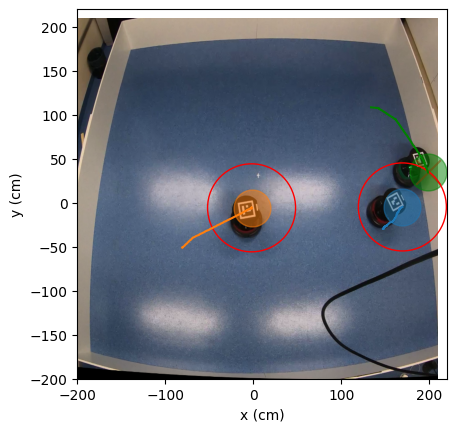

In [ ]:


run2 = merged_robot_real_improve3[5] 

# opencv stretch goal






#pts1 = [[120,90],[780,90],[20,790],[800,700]]
#pts2 = [[0,0],[800,0],[0,800],[800,800]]

#pts1 = np.float32(pts1)
#pts2 = np.float32(pts2)

#M = cv2.getPerspectiveTransform(pts1,pts2)
#rotated = cv2.warpPerspective(img,M,(800,800))



cv2.imwrite('../imgs/visualisations/last_frame.png',(img * 255).astype(np.uint8))
plt.imshow(img,cmap='gray',extent=[-200,210,-200,210])
plot_run(run2)






In [ ]:
'''
ax = plt.axes(projection='3d')

# on top of the axis
ax.view_init(0, 0)

# every 100 th pixel

selected = coords[::10]
color = new_img[::10] / 255
print(selected.shape)
print(color.shape)
ax.scatter(selected[:,0],selected[:,1],selected[:,2],c=color,s=0.1)
plt.show()
'''


"\nax = plt.axes(projection='3d')\n\n# on top of the axis\nax.view_init(0, 0)\n\n# every 100 th pixel\n\nselected = coords[::10]\ncolor = new_img[::10] / 255\nprint(selected.shape)\nprint(color.shape)\nax.scatter(selected[:,0],selected[:,1],selected[:,2],c=color,s=0.1)\nplt.show()\n"

/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/528504044.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reward_predator1'] = df['reward_predator1'] * 0.8
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/528504044.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reward_predator2'] = df['reward_predator2'] * 0.8
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/528504044.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

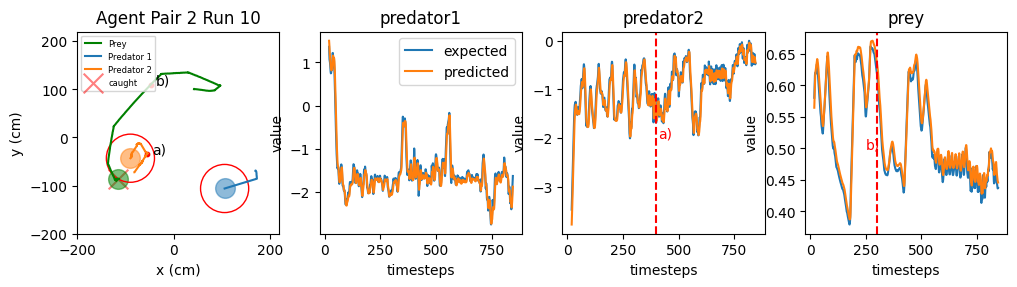

In [ ]:
gamma = 0.99
def compute_return(df,agent='predator1',factor=1000):
    global gamma
    standardize = df[f'reward_{agent}'] / factor
    print(standardize.min(),standardize.max())
    #standardize = (standardize - standardize.mean()) / standardize.std()
    discounted_reward = list(reversed(standardize)) #/ 1000 * 0.8
    for i in range(1,len(discounted_reward)):
        discounted_reward[i] = discounted_reward[i-1] * gamma + discounted_reward[i]

    discounted_reward.reverse()
    return pd.Series(discounted_reward)

def compute_gae(df,agent='predator1',factor=1000):
    #generalized advantage estimation
    
    global gamma
    lambda_ = 1.0
    delta_t = df[f'reward_{agent}'] / factor  + gamma * df[f'value_{agent}'].shift(-1) - df[f'value_{agent}']
    delta_t = delta_t.fillna(0)
    delta_t_plus_1 = delta_t.shift(1)
    delta_t_plus_1 = delta_t_plus_1.fillna(0)
    gae = delta_t + gamma * lambda_ * delta_t_plus_1
    return gae

selected_run,caught = clean_df(merged_robot_real_improve2[8].dropna())

#selected_run['reward_predator1'].iloc[-1] = 0

predicted_pred1 = selected_run['value_predator1'].rolling(20).mean()
expected_pred1 = ((compute_gae(selected_run,'predator1')) + selected_run['value_predator1']).rolling(20).mean()

predicted_pred2 = selected_run['value_predator2'].rolling(20).mean()
expected_pred2 = (compute_gae(selected_run,'predator2') + selected_run['value_predator2']).rolling(20).mean()

#selected_run['reward_predator1'].plot()

predicted = selected_run['value_prey'].rolling(20).mean()
expected = (compute_gae(selected_run,'prey',factor=1400) + selected_run['value_prey']).rolling(20).mean()


plt.figure(figsize=(4*3,3))
plt.subplot(1,4,1)

info = f'Agent Pair {selected_run["file_predator2_r"].iloc[-1].split("/")[-2][-1]} Run {int(selected_run["file_predator2_r"].iloc[-1].split("/")[-1].replace(".csv","")[-1]) + 1}'

plt.title(info)
plot_run(selected_run)

plt.legend(['Prey','Predator 1','Predator 2','caught'],loc='upper left',prop={'size': 6})
plt.scatter(selected_run['x_prey'].iloc[300],selected_run['y_prey'].iloc[300],color='r',s=10)
plt.annotate('b)', xy=(selected_run['x_prey'].iloc[300] + 10, selected_run['y_prey'].iloc[300]))
plt.scatter(selected_run['x_predator2'].iloc[400],selected_run['y_predator2'].iloc[400],color='r',s=10)
plt.annotate('a)', xy=(selected_run['x_predator2'].iloc[400] + 10, selected_run['y_predator2'].iloc[400]))

plt.subplot(1,4,2)
plt.title('predator1')
plt.plot(expected_pred1,label='expected')
plt.plot(predicted_pred1,label='predicted')
plt.gca().set_aspect(1.0/plt.gca().get_data_ratio(), adjustable='box')
plt.xlabel('timesteps')
plt.ylabel('value')
plt.legend()


plt.subplot(1,4,3)
plt.title('predator2')
plt.plot(expected_pred2,label='expected')
plt.plot(predicted_pred2,label='predicted')
plt.axvline(400,color='r',linestyle='dashed')
plt.annotate('a)', xy=(410, -2),color='r')
plt.xlabel('timesteps')
plt.ylabel('value')
plt.gca().set_aspect(1.0/plt.gca().get_data_ratio(), adjustable='box')

plt.subplot(1,4,4)
plt.title('prey')

plt.plot(expected,label='expected')
plt.plot(predicted,label='predicted')
plt.gca().set_aspect(1.0/plt.gca().get_data_ratio(), adjustable='box')

min_e = min(expected.min() , predicted.min())
max_e = max(expected.max(), predicted.max())

plt.xlabel('timesteps')
plt.ylabel('value')
plt.axvline(300,color='r',linestyle='dashed')
plt.annotate('b)', xy=(250, 0.5),color='r')







#selected_run['reward_predator1'].plot(label='reward')
#(compute_return(selected_run)).plot(label='return')

plt.savefig('../imgs/visualisations/value-function.png', dpi=300, bbox_inches='tight')

plt.show()




In [ ]:
#expected_pred1.plot()
predicted.min(),predicted.max()

(0.3872621633112431, 0.6705401803056399)

In [ ]:

#print(datas_improve1_sim[0].head())
#plot_run(datas_improve2_sim[7])

   steps          time           x           y       yaw action     value  \
0      0  1.691274e+09 -129.338913  151.763687 -2.439825  False -0.186730   
1      0  1.691274e+09 -129.338913  151.763687 -2.439825  False -0.202707   
2      0  1.691274e+09 -129.338913  151.763687 -2.439825  False -0.206056   
3      0  1.691274e+09 -129.338913  151.763687 -2.439825  False -0.003004   
4      0  1.691274e+09 -129.338913  151.763687 -2.439825  False -0.043852   

   reward                                               file  id     angle  
0       1  ../data/eval/improve1/Iteration3/prey_1_169127...   2 -2.439825  
1       1  ../data/eval/improve1/Iteration3/prey_1_169127...   2 -2.439825  
2       1  ../data/eval/improve1/Iteration3/prey_1_169127...   2 -2.439825  
3       1  ../data/eval/improve1/Iteration3/prey_1_169127...   2 -2.439825  
4       1  ../data/eval/improve1/Iteration3/prey_1_169127...   2 -2.439825  


KeyError: 'x_prey'

<Figure size 1000x1000 with 0 Axes>

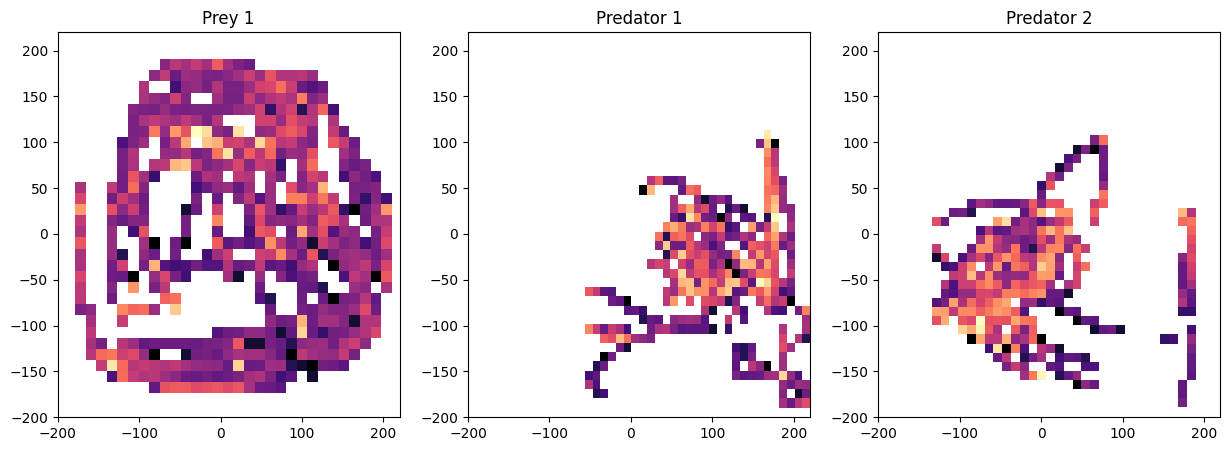

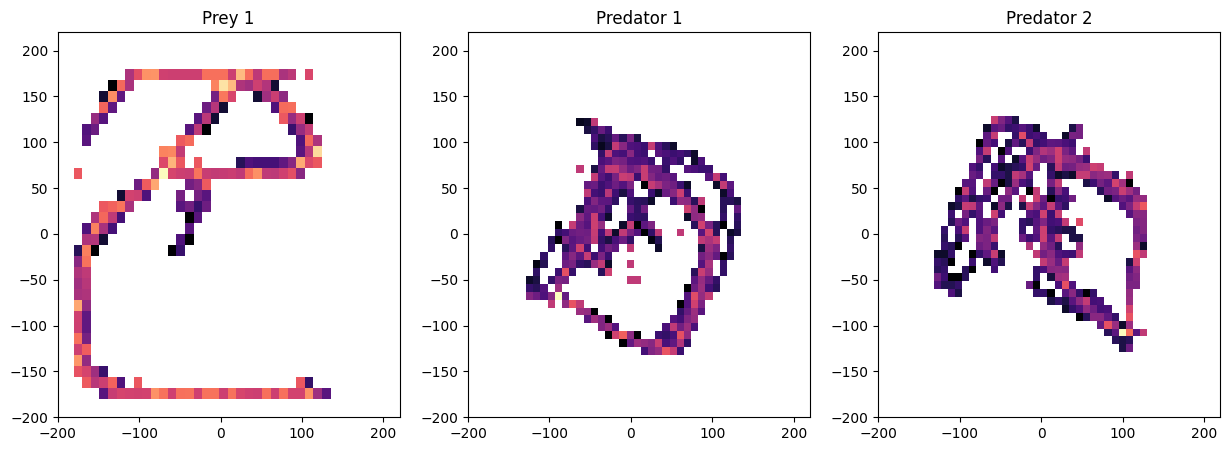

In [ ]:
import matplotlib.colors as colors







plt.figure(figsize=(10,10))
cmaps = ['inferno','viridis','plasma','magma','cividis']

def plot_hist(data,cmap='viridis'):
    #log scale 
    
    plt.hist2d(data['x'],data['y'],bins=30,norm=colors.LogNorm(),cmap=cmap)
    plt.xlim(-200,220)
    plt.ylim(-200,220)
    #plt.hist2d(prey1['x'],prey1['y'],bins=50,)
    #plt.colorbar()
    #plt.show()

def plot_hists(data):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('Prey 1')
    plot_hist(select_id(data,2),cmap='magma')
    plt.subplot(1,3,2)
    plt.title('Predator 1')
    plot_hist(select_id(data,3),cmap='magma')
    plt.subplot(1,3,3)
    plt.title('Predator 2')
    plot_hist(select_id(data,13),cmap='magma')

plot_hists(all_improves)
plt.show()

plot_hists(all_improves_sim)





In [ ]:
prey = select_id(positions,2)
predator1 = select_id(positions,3)
predator2 = select_id(positions,13)
# to time.time() format
#prey['time'] = prey['time'].astype(np.float64)
#predator1['time'] = predator1['time'].astype(np.float64)
#predator2['time'] = predator2['time'].astype(np.float64)

prey.set_index('time',inplace=True)
predator1.set_index('time',inplace=True)
predator2.set_index('time',inplace=True)

#(prey.time, predator1.time)


def get_elements(data):
    #print('Setting index to time')
    #print(data)
    
    data = data.copy()
    data['time'] = data.time.apply(lambda x: datetime.datetime.fromtimestamp(x))

    #print('Setting index')
    
    #print('Selecting prey and predators')
    prey = select_id(data,2)
    prey.set_index('time',inplace=True)
    prey.sort_index(inplace=True)
    predator1 = select_id(data,3)
    predator1.set_index('time',inplace=True)
    predator1.sort_index(inplace=True)
    predator2 = select_id(data,13)
    predator2.set_index('time',inplace=True)
    predator2.sort_index(inplace=True)

    

    return prey,predator1,predator2

def dist_between(prey,predator):
    prey.sort_index(inplace=True)
    predator.sort_index(inplace=True)
    #print(prey.x,predator.x)
    unique_times = sorted(set(np.concatenate((prey.index.values,predator.index.values))))
    #print(unique_times)
    
    predator = predator.reindex(unique_times,method='nearest').interpolate(method='linear')
    prey = prey.reindex(unique_times,method='nearest').interpolate(method='linear')

    xdiff = prey.x - predator.x
    ydiff = prey.y - predator.y
    #print(xdiff,ydiff)
    under_sqrt = (xdiff**2 + ydiff**2).astype(np.float64)
    dist = np.sqrt(under_sqrt)

    return dist




In [ ]:
all_improve2.file.unique() 

array(['improve2/Iter8.csv', 'improve2/Iter9.csv', 'improve2/Iter2.csv',
       'improve2/Iter3.csv', 'improve2/Iter1.csv', 'improve2/Iter0.csv',
       'improve2/Iter4.csv', 'improve2/Iter7.csv', 'improve2/Iter6.csv'],
      dtype=object)

In [ ]:
interesting = all_improve2.file == 'improve2/Iter1.csv'
interesting = all_improve2[interesting]



prey,predator1,predator2 = get_elements(interesting)


max_time_delta = datetime.timedelta(days=9999)

caught_dist = 60

def get_time_caught(prey,predator1,predator2):
    global caught_dist
    # smooth out the data so we can compare them 
    

    dist_p1 = dist_between(prey,predator1)
    dist_p2 = dist_between(prey,predator2)

    #print(dist_p1)
    #print(dist_p2)

    dist_p1.index = dist_p1.index - dist_p1.index[0]
    dist_p2.index = dist_p2.index - dist_p2.index[0]
    dist_p1 = dist_p1.fillna(np.Infinity)
    dist_p2 = dist_p2.fillna(np.Infinity)
    all_dists = pd.concat([dist_p1,dist_p2])
    min_dist = all_dists.min()
    min_dist_t = all_dists.idxmin()
    t1 = dist_p1[dist_p1 < caught_dist].index.min()
    t2 = dist_p2[dist_p2 < caught_dist].index.min() 

    #print(t1,t2)    

    t1 = t1 if not pd.isnull(t1) else max_time_delta
    t2 = t2 if not pd.isnull(t2) else max_time_delta
    
    #print(t1,t2)

    min_t = np.min([t1,t2])
    min_arg = np.argmin([t1,t2])

    if min_t == max_time_delta:
        min_t = np.nan

    return min_t,min_dist,min_dist_t,min_arg


get_time_caught(prey,predator1,predator2)





(Timedelta('0 days 00:00:37.937900'),
 39.10590550856535,
 Timedelta('0 days 00:01:00.060000'),
 1)

In [ ]:
# time to caught for all 
def get_caughts(data):
    results = []
    for d in data:
        d.sort_values(by='time')
        prey,predator1,predator2 = get_elements(d)
        caught_time,min_dist,min_dist_t,caught_arg = get_time_caught(prey,predator1,predator2)

        results.append({
            'time':caught_time,
            'min_dist':min_dist,
            'min_dist_t':min_dist_t,
            'file':d['file'].loc[0],
        })
        

    return pd.DataFrame(results)

def remove_after_caught(data):

    prey,predator1,predator2 = get_elements(data)

    caught_time,min_dist,min_dist_t,min_arg = get_time_caught(prey,predator1,predator2)
    #print('Caught time: ',caught_time)
    #print('Caught time: ',caught_time)
    #print('Caught: ',caught_time != np.Infinity)
    caught = not pd.isnull(caught_time) and caught_time != np.nan

    if caught:
        #print('Caught time:1 ')
        #data = data.sort_values(by='time')
        times = data.time.apply(lambda x: datetime.datetime.fromtimestamp(x))
        #print(data)
        #print('time',times)
        #print('caught time',caught_time + times[0])
        data = data[times.values <= caught_time + times.values[0] + datetime.timedelta(seconds=1)]

    return data,caught,min_arg

def travel_dist(entiy):

    befor_sqrt = (np.diff(entiy['x'])**2 + np.diff(entiy['y'])**2).astype(np.float64)
    return np.sum(np.sqrt(befor_sqrt))

def all_travel_dist(data):
    prey,predator1,predator2 = get_elements(data)
    return travel_dist(prey),travel_dist(predator1),travel_dist(predator2)

In [ ]:
(~get_caughts(datas_improve1).time.isnull()).sum(), (~get_caughts(datas_improve2).time.isnull()).sum(), (~get_caughts(datas_improve3).time.isnull()).sum()

(3, 4, 8)

In [ ]:
(~get_caughts(datas_improve1_sim).time.isnull()).sum(), (~get_caughts(datas_improve2_sim).time.isnull()).sum(), (~get_caughts(datas_improve3_sim).time.isnull()).sum()

/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/278149342.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predator1.sort_index(inplace=True)
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/278149342.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predator2.sort_index(inplace=True)
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/278149342.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

(1, 0, 8)

In [ ]:
#datas_improve1_sim
get_caughts(datas_improve3_sim), get_caughts(datas_improve1_sim), get_caughts(datas_improve2_sim)

/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/278149342.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prey.sort_index(inplace=True)
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/278149342.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predator1.sort_index(inplace=True)
/var/folders/hv/7vlgm5617075b1s7cz_n2wx80000gn/T/ipykernel_18434/278149342.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

(                    time   min_dist             min_dist_t  \
 0 4 days 23:36:00.244017  59.365226 4 days 23:36:00.244017   
 1 4 days 23:35:31.808095  58.160247 4 days 23:35:31.808095   
 2        0 days 00:00:00  55.681163        0 days 00:00:00   
 3        0 days 00:00:00  52.139455        0 days 00:00:00   
 4 4 days 23:33:22.658173  59.186697 4 days 23:33:22.658173   
 5 4 days 23:34:03.533493  59.953764 4 days 23:34:03.533493   
 6                    NaT  61.747381 4 days 23:38:05.732493   
 7        0 days 00:00:00  57.266050        0 days 00:00:00   
 8                    NaT  61.877235 4 days 23:35:35.339150   
 9        0 days 00:00:00  51.149037        0 days 00:00:00   
 
                                                 file  
 0  0    ../data/eval/improve3/Iteration3/prey_1_1...  
 1  0    ../data/eval/improve3/Iteration4/prey_1_1...  
 2  0    ../data/eval/improve3/Iteration5/predator...  
 3  0    ../data/eval/improve3/Iteration2/predator...  
 4  0    ../data/eval/imp

In [ ]:
def file_to_name(file, fmat):
    split = file.split('/')
    #print(file)
    if fmat == 'real':
        

        agent_num = int(split[0][-1])

        iteration = int(split[1].split('.')[0][-1]) + 1

        return f'#{agent_num} Iteration {iteration}'
        # ./data/eval/improve1/Iteration3/prey_1_1691274174.4267921.csv
    else:
        
        agent_num = int(split[-3][-1])

        iteration = int(split[-2][-1]) + 1

        return f'#{agent_num} Iteration {iteration}'
        # ./data/eval/improve1/Iteration3/prey_1_1691274174.4267921.csv



def plot_better(i):
    i,caught,id_ = remove_after_caught(i)
    prey_travel,p1_travel,p2_travel = all_travel_dist(i)
    plot_run(i,caught,id_)

def plot_all(datas,fmat):
    plt.figure(figsize=(len(datas) * 5.5,5))
    idx = 0

    prey_total_travel = 0
    p1_total_travel = 0
    p2_total_travel = 0

    for i in datas:
        #print(i)
        i,caught,id_ = remove_after_caught(i)

        # check for empty data
        if i.empty:
            continue
        #print(caight)
        prey_travel,p1_travel,p2_travel = all_travel_dist(i)
        #print(f'Prey travel: {prey_travel} P1 travel: {p1_travel} P2 travel: {p2_travel}')
        prey_total_travel += prey_travel
        p1_total_travel += p1_travel
        p2_total_travel += p2_travel
        #print(i)
        plt.subplot(1,len(datas),idx+1)
        s = '(caught)' if caught else ''

        #print(i.file)
        #print(i)
        

        name = file_to_name(i.file.iloc[0],fmat) + s


        plt.title(name)
        idx += 1
        plot_run(i,caught,id_)

    print(f'Prey total travel: {prey_total_travel} P1 total travel: {p1_total_travel} P2 total travel: {p2_total_travel}')
    print(f'Prey average travel: {prey_total_travel/len(datas)} P1 average travel: {p1_total_travel/len(datas)} P2 average travel: {p2_total_travel/len(datas)}')

#plot_all(datas_improve1,'real')
#plot_all(datas_improve2,'real')
#plot_all(datas_improve3,'real')

#plot_all(datas_improve1_sim,'sim')
#plot_all(datas_improve2_sim,'sim')
#plot_all(datas_improve3_sim,'sim')




In [ ]:
print(list(datas_improve1_sim[0].file.loc[1].items())[0])

(1, '../data/eval/improve1/Iteration3/prey_1_1691274174.4267921.csv')


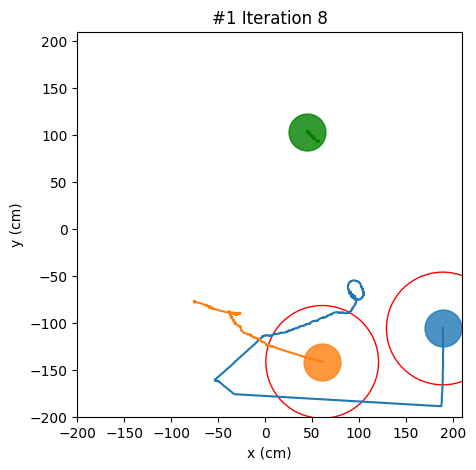

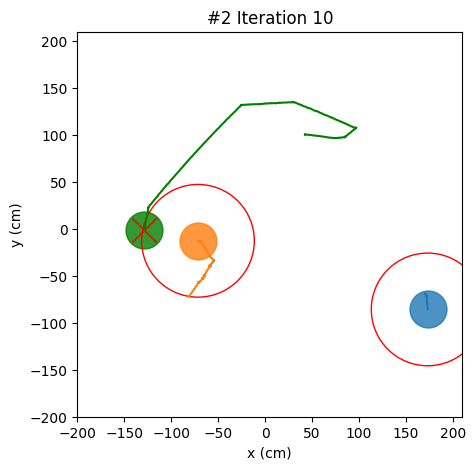

In [ ]:
all_improves_list = [datas_improve1,datas_improve2,datas_improve3]

selected = [[0,8],[1,1]]

names =['no-prey-motion','caught-after-close']
i = 0
for idxs in selected:
    d = all_improves_list[idxs[0]][idxs[1]]

    plt.figure(figsize=(5,5))
    # write to file 
    name = file_to_name(d.file.loc[0],'real')
    plt.title(name)
    plot_better(d)
    plt.savefig('../imgs/visualisations/{}.png'.format(names[i]), dpi=300, bbox_inches='tight')
    i += 1


In [ ]:

predator_pretrain = pd.read_csv('../data/training/Predator-pretrain.csv')
improve1_predator = pd.read_csv('../data/training/improve1-predator.csv')
improve2_predator = pd.read_csv('../data/training/imporve2-predator.csv')
improve3_predator = pd.read_csv('../data/training/improve3-predator.csv')

improve1_prey = pd.read_csv('../data/training/improve1-prey.csv')
improve2_prey = pd.read_csv('../data/training/improve2-prey.csv')
improve3_prey = pd.read_csv('../data/training/improve3-prey.csv')

improve2_2_predator = pd.read_csv('../data/training/improve2-2-predator.csv')
improve2_2_prey = pd.read_csv('../data/training/improve2-2-prey.csv')

improve3_2_predator = pd.read_csv('../data/training/improve3-2-predator.csv')
improve3_2_prey = pd.read_csv('../data/training/improve3-2-prey.csv')
predator_test = pd.read_csv('../data/training/Predator_test.csv')
prey_test = pd.read_csv('../data/training/prey_test.csv')




def combine(arr):
    global_step = 0
    result = []
    steps = []
    for a in arr:
        df = pd.DataFrame()

        df['global_step'] = a['global_step'] + global_step
        
        global_step += a['global_step'].max()
        steps.append(global_step)

        col = a.columns

        mean_col = [c for c in col if 'mean' in c][0]

        df['MEAN'] = a[mean_col]

        result.append(df)


    return pd.concat(result),steps


improve1_all_predator,_, = combine([predator_pretrain,improve1_predator,predator_test])

improve1_all_prey,_ = combine([improve1_prey,prey_test])
improve1_all_prey['global_step'] = improve1_all_prey['global_step'] + predator_pretrain['global_step'].max()

improve2_all_predator,steps = combine([predator_pretrain,improve2_predator,improve2_2_predator])

improve2_all_prey,_ = combine([improve2_prey,improve2_2_prey])

improve2_all_prey['global_step'] = improve2_all_prey['global_step'] + predator_pretrain['global_step'].max()


improve3_all_predator,steps = combine([predator_pretrain,improve3_predator,improve3_2_predator])




improve3_all_prey,_ = combine([improve3_prey,improve3_2_prey])
improve3_all_prey['global_step'] = improve3_all_prey['global_step'] + predator_pretrain['global_step'].max()


In [ ]:
improve3_all_predator

,global_step,MEAN
0,4000,0.065206
1,8000,0.038357
2,12000,0.033243
3,16000,0.031052
4,20000,0.032229
...,...,...
175,1564000,0.637523
176,1568000,0.638635
177,1572000,0.720807
178,1576000,0.718883


281 1.0
281 1.0
[140000, 860000, 1580000]
global_step    1.268000e+06
MEAN          -1.197000e-01
Name: 101, dtype: float64


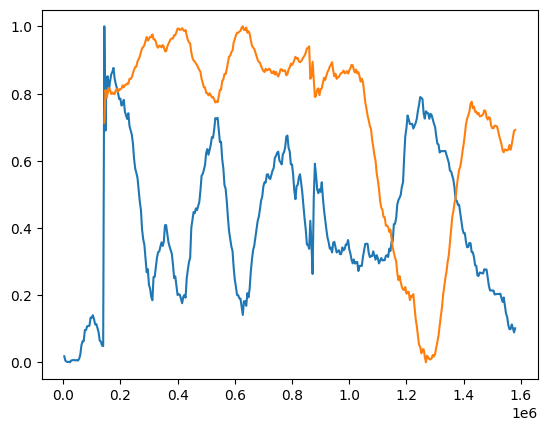

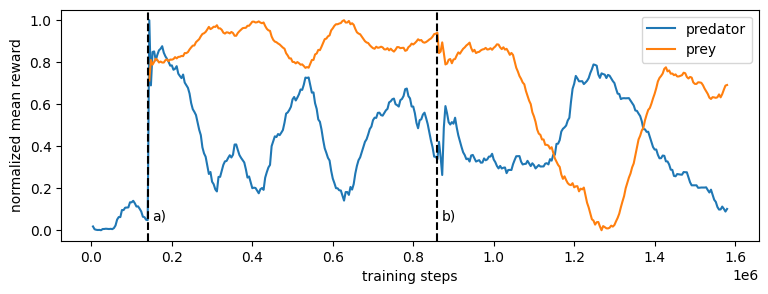

In [ ]:
#plt.plot(improve2_all_predator[]
abc = 'abc'
def plot_training(predator,prey):
    norm_predator = (predator['MEAN'] - predator['MEAN'].min()) / (predator['MEAN'].max() - predator['MEAN'].min())
    norm_prey = (prey['MEAN'] - prey['MEAN'].min()) / (prey['MEAN'].max() - prey['MEAN'].min())
    norm_predator = norm_predator.rolling(1).mean()
    norm_prey = norm_prey.rolling(1).mean()
    print(np.argmin(norm_prey),norm_prey.max())
    plt.plot(predator['global_step'],norm_predator,label='predator')
    plt.plot(prey['global_step'],norm_prey,label='prey')
    
    
plot_training(improve1_all_predator,improve1_all_prey)
plt.figure(figsize=(3*3,3))
plot_training(improve1_all_predator,improve1_all_prey)
#plot_training(improve3_all_predator,improve3_all_prey)
#plot_training(improve2_all_predator,improve2_all_prey)

i = 0
for step in steps[:-1]:
        plt.axvline(x=step,color='black',linestyle='--')
        plt.text(step+10000,0.05,abc[i] + ')')
        i += 1

print(steps)

print(improve1_all_prey.iloc[281])

plt.legend(loc='upper right')
plt.xlabel('training steps')
plt.ylabel('normalized mean reward')

plt.savefig('../imgs/visualisations/training-run.png',dpi=300,bbox_inches='tight')


<AxesSubplot:title={'center':'Mean of all prey'}>

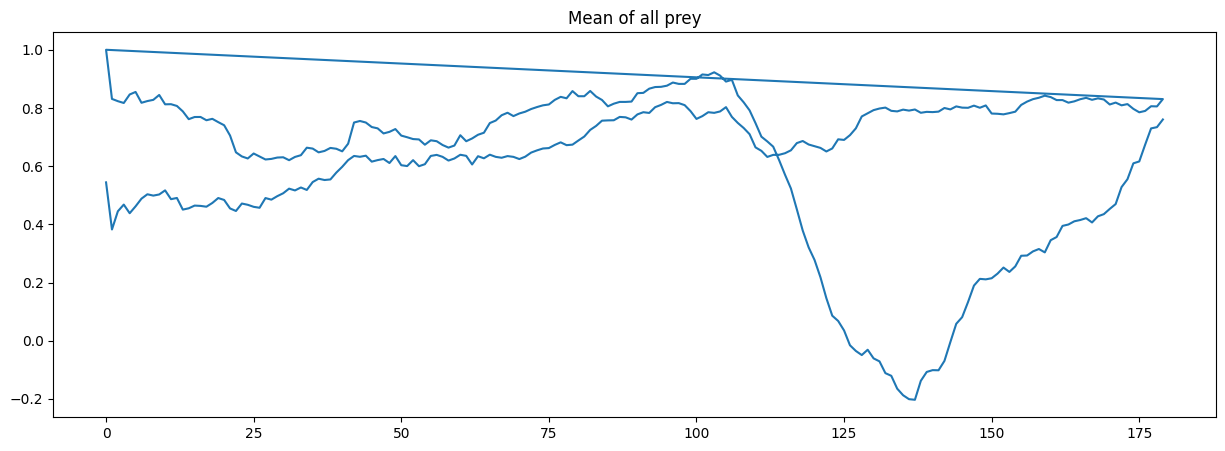

In [ ]:
improve2_all_prey['MEAN'].plot(figsize=(15,5), title='Mean of all prey')